In [215]:
# Importing required Libraries

import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [216]:
### Step 1:  Reading the Data

In [217]:
df=pd.read_csv("day.csv")

In [218]:
### Step 2 : EDA on the read data

In [219]:
#Checking a sample of the data

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Note:
the following variables can be removed from further analysis -

**instant**: It is only an index value,
**dteday**: This has the date, Since we already have separate columns for 'year' & 'month' we could live without this column,
**casual & registered**: Both these columns contains the count of bike booked by different categories of customers. From the pairplot as well as the correlation heatmap, we can concur that total bike rental value 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [220]:
# Removing Redundant columns
columns_to_drop = ['instant', 'dteday', 'casual','registered']

# Drop the columns in place
df.drop(columns_to_drop, axis=1, inplace=True)

In [221]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [222]:
#Checking the shape of the dataframe 
df.shape

(730, 12)

In [223]:
#Note: The dataframe has 730 rows and 16 columns

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [225]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Insight:
Except one column which is date type, all other are either float or integer type.
There are some fields that are categorical in nature, but are in integer/float type. Example : season, mnth, weathersit etc.
We will have to analyze and decide whether to convert them to categorical or treat as integer.

### Converting season, mnth,weathersit and weekday to categorical columns

* **season**: converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter
* **mnth**: converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
* **weathersit**: converting weathersit values as 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
* **weekday**: converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat

In [226]:
### Imputing season column codes with their descriptions

df.season=df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [227]:
### Imputing weathersit column codes with their descriptions

df.weathersit=df.weathersit.map({1:'Clear', 2:'Misty', 3:'Light_rainsnow', 4:'Heavy_rainsnow'})
df.weathersit.value_counts()

Clear             463
Misty             246
Light_rainsnow     21
Name: weathersit, dtype: int64

In [228]:
# imputing month column codes with their descriptions

df.mnth=df.mnth.map({1:'jan', 2:'feb', 3:'mar',4:'apr',5:'may',6:'jun',
                     7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.mnth.value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [229]:
# imputing weekday column codes with their descriptions

df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
df.weekday.value_counts()

Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64

### Categorical Variable Analysis

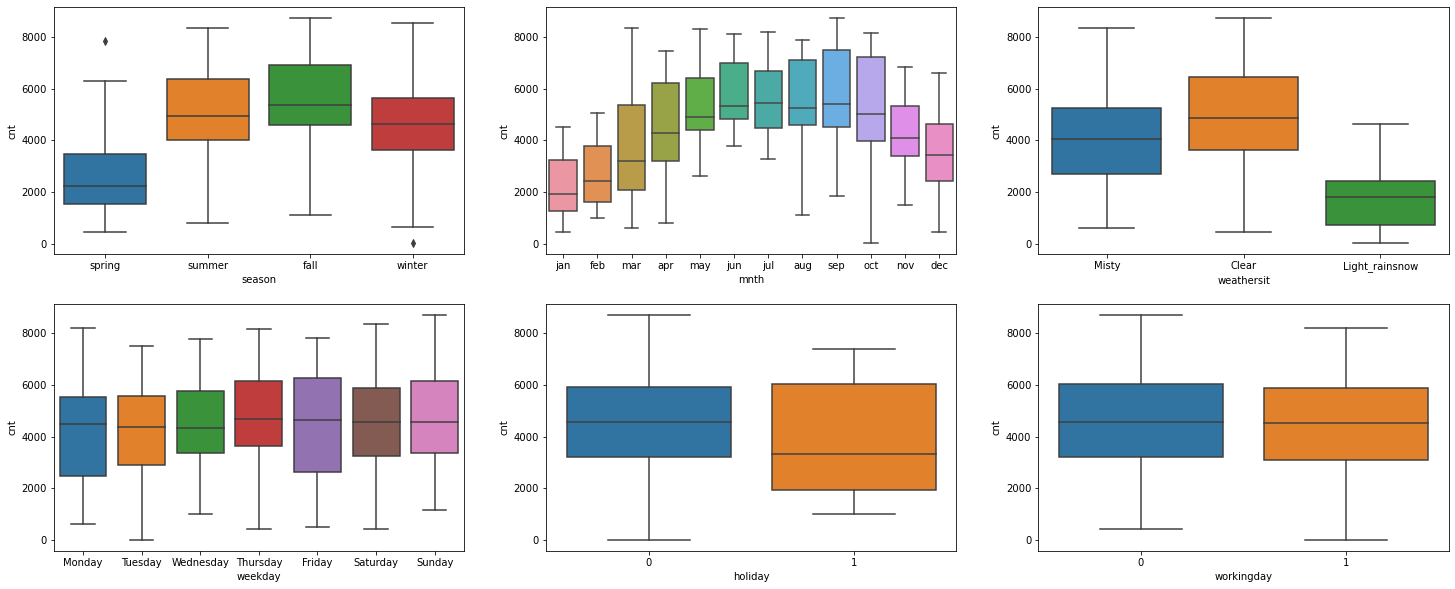

In [230]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()


In [231]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = df.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/df.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/df.cnt.count()*100
    return round(cat_df,2)

In [232]:
# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=df, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

### Season :

In [233]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
fall,1061129,5644.30,188,32.24,25.75
summer,918589,4992.33,184,27.91,25.21
winter,841613,4728.16,178,25.57,24.38
spring,469514,2608.41,180,14.27,24.66


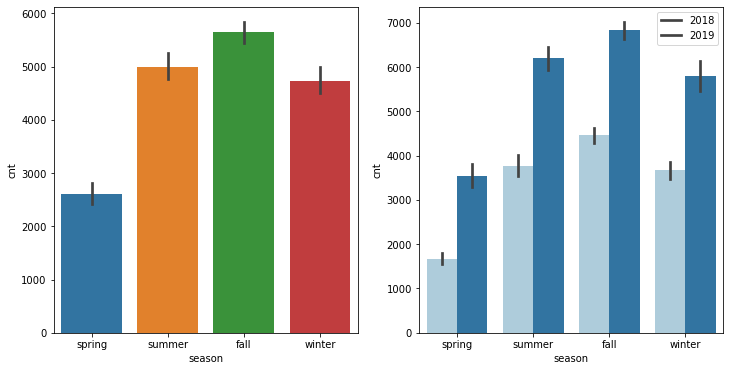

In [234]:
categorical_plot('season',12,6)

### Insight:
Almost 32% of the bike booking were happening in Fall with a median of over 5000 bookings (for two years). It is followed by Summer & Winter with 27% & 25% of total booking. It indicates that the season can be a good predictor of the dependent variable.

### Month 

In [235]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
aug,351194,5664.42,62,10.67,8.49
jun,346342,5772.37,60,10.52,8.22
sep,345991,5766.52,60,10.51,8.22
jul,344948,5563.68,62,10.48,8.49
may,331686,5349.77,62,10.08,8.49
oct,322352,5199.23,62,9.80,8.49
apr,269094,4484.90,60,8.18,8.22
nov,254831,4247.18,60,7.74,8.22
mar,228920,3692.26,62,6.96,8.49


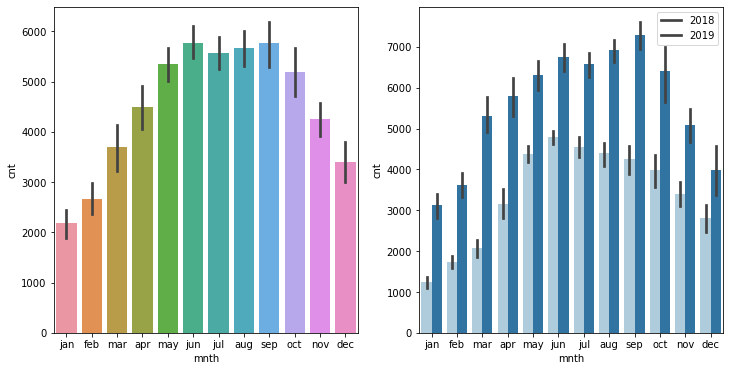

In [236]:
categorical_plot('mnth',12,6)

### Insight:
Almost 10% of the bike booking was happening in the months' May to Sep with a median of over 4000 bookings per month. It indicates that the mnth has some trend for bookings and can be a good predictor for the dependent variable.

### Weather

In [237]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


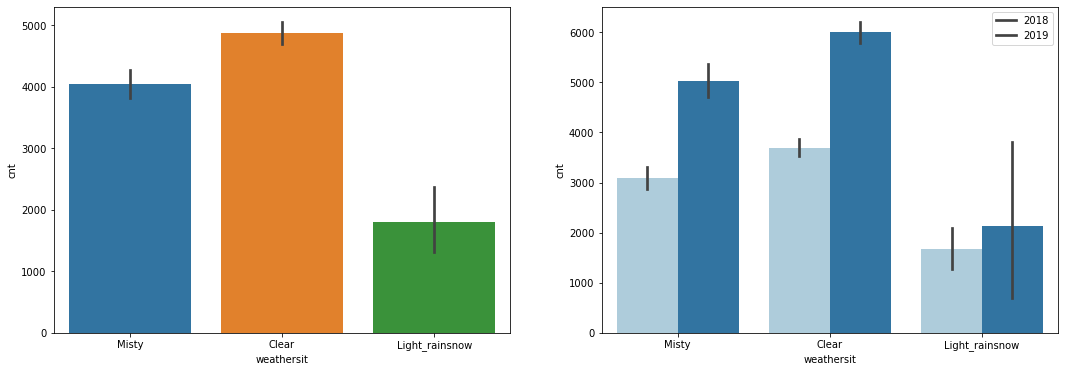

In [238]:
categorical_plot('weathersit',18,6)

### Insight:
Almost 68.6% of the bike booking was happening during Clear weather with a median of close to 5000 bookings (for two years). This was followed by Misty with 30% of the total booking. It indicates that the weathersit does show some trend towards the bike bookings, and it can be a good predictor for the dependent variable. The current data frame does not have any data where the weather is Heavy_RainSnow

### Weekday 

In [239]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Thursday,487923,4691.57,104,14.83,14.25
Sunday,485235,4665.72,104,14.74,14.25
Saturday,481176,4626.69,104,14.62,14.25
Friday,478132,4597.42,104,14.53,14.25
Wednesday,462276,4444.96,104,14.05,14.25
Tuesday,448822,4274.50,105,13.64,14.38
Monday,447281,4259.82,105,13.59,14.38


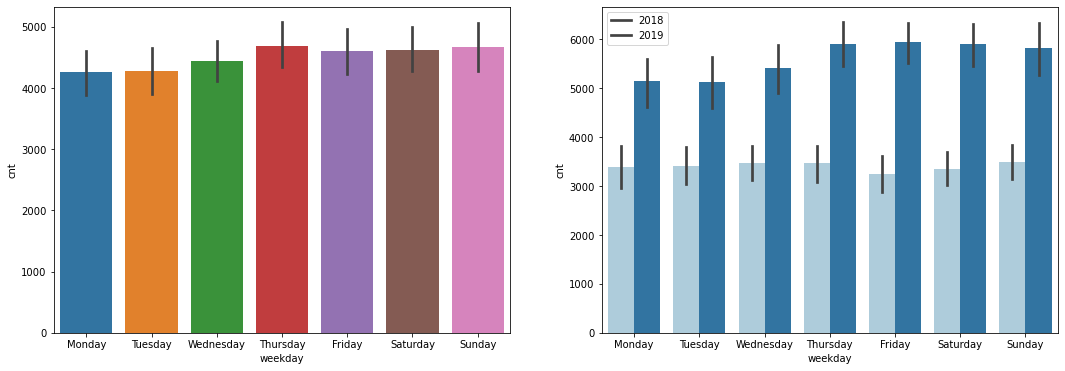

In [240]:
categorical_plot('weekday',18,6)

### Insight:
weekday variable shows the very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence on the predictor. Further analysis would be needed to determine whether this attribute needs to be included in the model parameter selection

### Holiday 

In [241]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


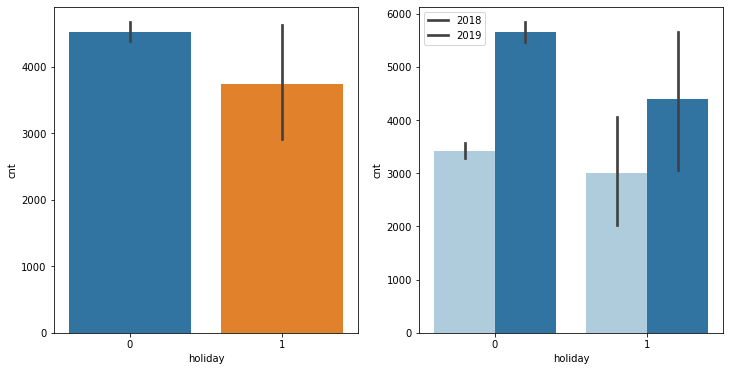

In [242]:
categorical_plot('holiday',12,6)

### Insight:
Almost 97% of bike rentals are happening during non-holiday time.

### Working Day :

In [243]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


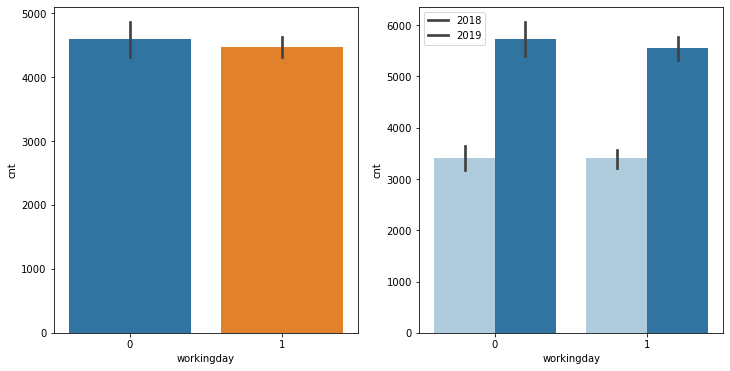

In [244]:
categorical_plot('workingday',12,6)

### Insight:
Almost 69% of the bike booking were happening in 'workingday' with a median of close to 5000 bookings (for two years). It indicates that the workingday can be a good predictor of the dependent variable

### Year :

In [245]:
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


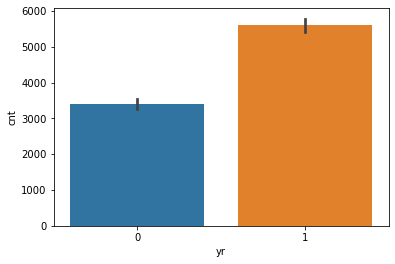

In [246]:
sns.barplot('yr','cnt',data=df)
plt.show()

### Insight:
Bike rental demand has gone up from 2018 to 2019

### Numerical Variable Analysis

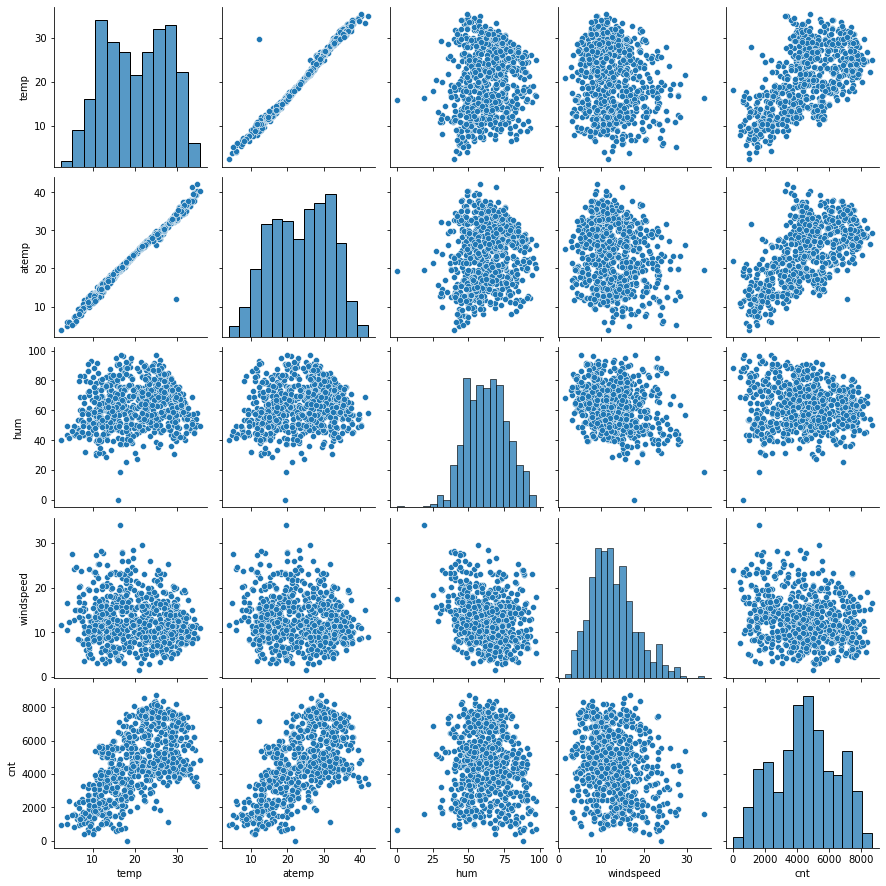

In [247]:
#Generating pairplot to check the relationships between numeric variables variables
bike_num = df[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

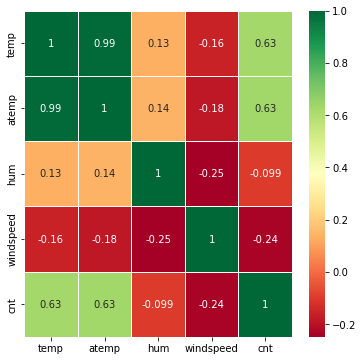

In [248]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn",linewidth =1)

### Insight: 
There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

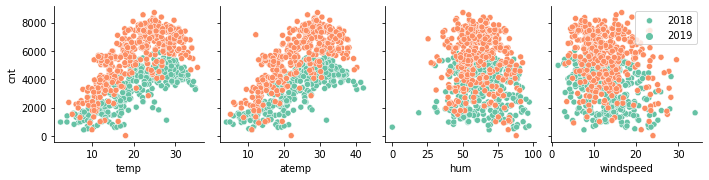

In [249]:
# Checking the impact of year against the numerical variable : 
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=df, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

### Insight: 
All the parameters have increased values in 2019 compared to 2018. Thus, year may become a key paratemeter in the model

### Dummy Variable Creation

In [250]:
### Season
season = pd.get_dummies(df['season'], drop_first = True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [251]:
### weather
weather = pd.get_dummies(df['weathersit'], drop_first = True)
weather.head()

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [252]:
### month
month = pd.get_dummies(df['mnth'], drop_first = True)
month.head(3)

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


### weekday

In [253]:
###weekday
weekday = pd.get_dummies(df['weekday'], drop_first = True)
weekday.head(3)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1


###  Merging the Dataframes

In [254]:
# Creating a new dataframe called bike_new where season, month, weather and weekday dataframe is being added
bike_new = pd.concat([df,season,month,weather,weekday], axis = 1)
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,spring,0,jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,spring,0,jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [255]:
bike_new.shape

(730, 34)

In [256]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  spring          730 non-null    uint8  
 13  summer          730 non-null    uint8  
 14  winter          730 non-null    uint8  
 15  aug             730 non-null    uint8  
 16  dec             730 non-null    uint8  
 17  feb             730 non-null    uin

### Removing unnecessary columns

In [257]:
#deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 30)

In [258]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  jul             730 non-null    uint8  
 16  jun             730 non-null    uint8  
 17  mar             730 non-null    uin

### Insight: 
All the 30 columns are now as numeric value. The dataframe is ready now for splitting into Train & Test dataframes

### Splitting the data into Train & Test Dataset

#### Train & Test Split

In [259]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 333)

#### Verifying the train - test split and new dataframe details

In [260]:
bike_train.shape

(510, 30)

In [261]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.690196,20.218078,23.590696,62.340743,12.771365,4494.103922,0.250980,0.245098,...,0.084314,0.082353,0.025490,0.343137,0.141176,0.143137,0.145098,0.139216,0.152941,0.131373
std,0.500487,0.151726,0.462867,7.500110,8.138271,14.418728,5.205888,1948.315655,0.434003,0.430568,...,0.278131,0.275172,0.157763,0.475223,0.348545,0.350557,0.352545,0.346511,0.360284,0.338139
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717923,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327088,72.958300,15.624869,5962.750000,0.750000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [262]:
bike_test.shape

(220, 30)

In [263]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,20.553817,24.040727,63.749086,12.745665,4540.236364,0.236364,0.268182,...,0.086364,0.081818,0.036364,0.322727,0.150000,0.140909,0.136364,0.150000,0.122727,0.168182
std,0.501120,0.198531,0.463173,7.533926,8.188064,13.790510,5.184271,1911.199159,0.425817,0.444023,...,0.281541,0.274713,0.187620,0.468586,0.357886,0.348721,0.343957,0.357886,0.328872,0.374881
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Insight: 
Based on the 70% - 30% split between train and test dataset we have 510 rows in train dataset and 220 in test dataset

###  Rescalling bike_train dataframe

In [264]:
# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

In [265]:
#Dataframe before scaling 
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,16.126653,19.5698,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,0,1,0,0,0
212,0,0,1,31.638347,35.1646,55.0833,10.500039,4266,0,0,...,0,0,0,0,0,0,0,0,0,1
714,1,0,1,14.862500,18.4969,83.8750,6.749714,3786,0,0,...,0,0,0,1,1,0,0,0,0,0


In [266]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [267]:
#Checking after rescalling
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,0,1,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,0,0,0,0,0,1
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,1,0,0,0,0,0


### Checking Correlation Coefficient

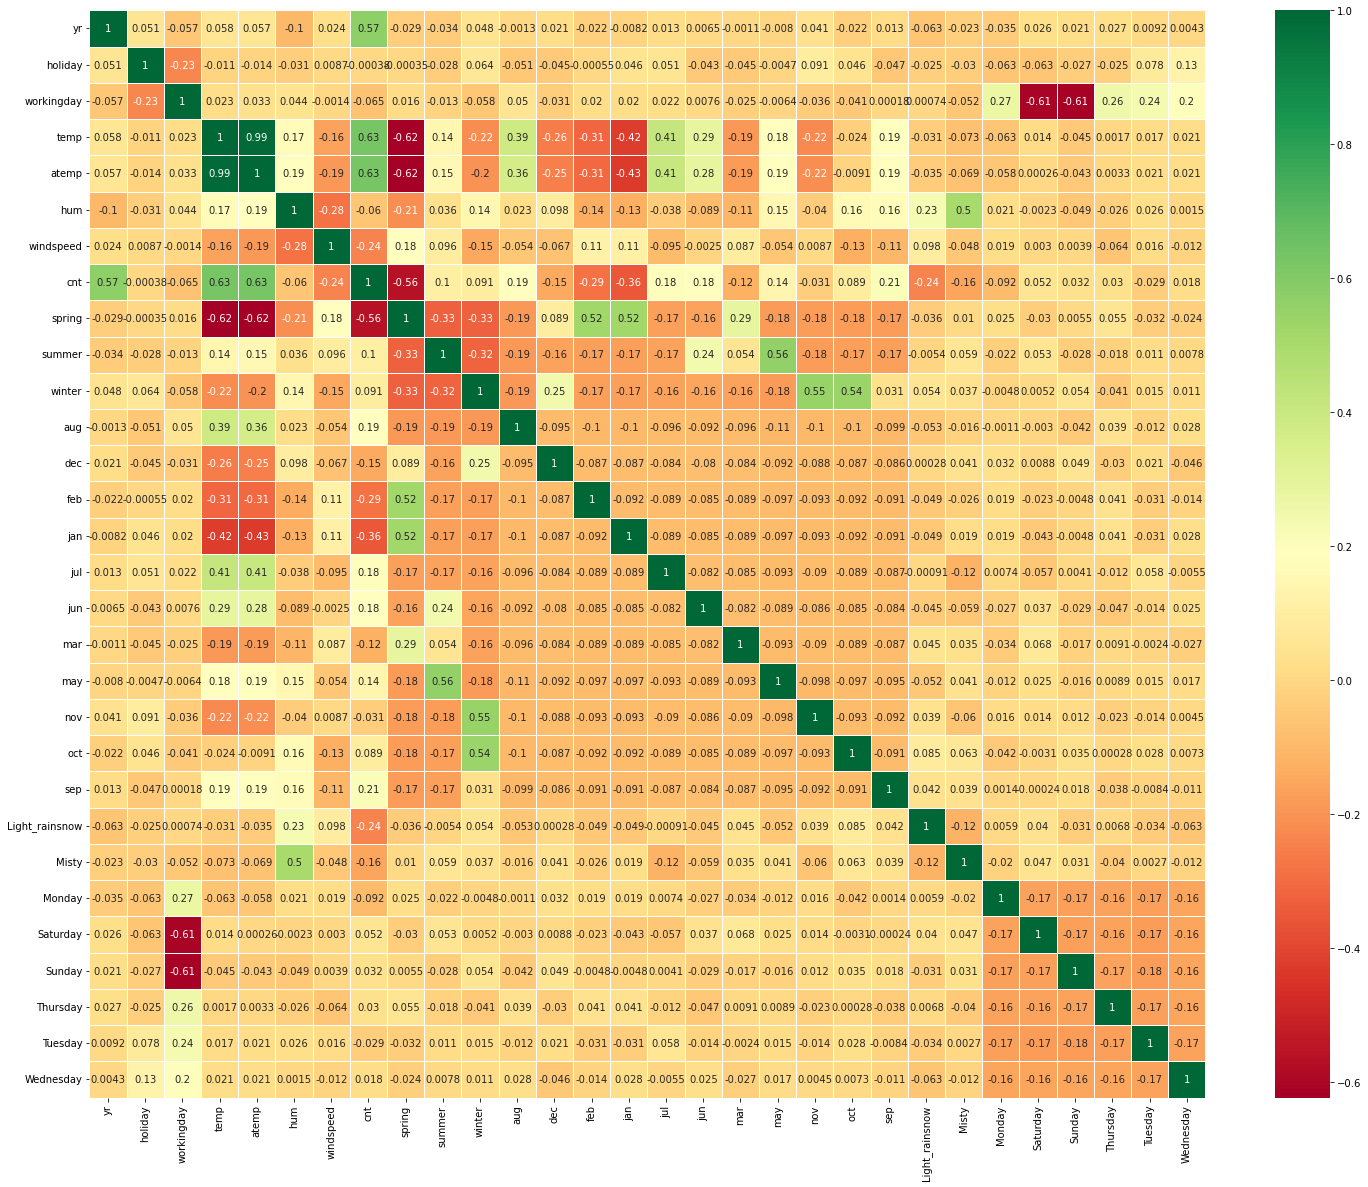

In [268]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

### Insight:
* There is multi-colinearity between the variables. We need to consider the factors when developing the model.

* temp and atemp has very high correlation value of 0.99. This suggest, we can use only one of these two variables
* workingday variable has high negative correlation with Sat & Sun (where workingday =0)
* Spring is negatively correlated with cnt
* temp, atemp and yr has strong correlation with cnt
* misty weather and humidity has correlation
* various months and corresponding weather has correlation

### Building the Linear Model

#### Dividing into X_train and y_train

In [269]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### RFE

**Recursive feature elimination**: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [270]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [271]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 6),
 ('jan', False, 5),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', True, 1),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 2),
 ('Thursday', False, 15),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11)]

In [272]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'dec',
       'jul', 'mar', 'nov', 'sep', 'Light_rainsnow', 'Misty', 'Saturday'],
      dtype='object')

In [273]:
weekday.value_counts()

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0         0       0         1        0            105
1       0         0       0         0        0            105
0       0         0       0         0        0            104
                                             1            104
                          1         0        0            104
                  1       0         0        0            104
        1         0       0         0        0            104
dtype: int64

In [274]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'summer', 'aug', 'feb', 'jan', 'jun', 'may',
       'oct', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [275]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Manual Model Development using statsmodel

In [276]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Model 1

In [277]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
1,temp,357.78
2,atemp,354.14
3,hum,22.92
4,windspeed,5.12
6,winter,2.76
5,spring,2.69
13,Misty,2.28
0,yr,2.05
10,nov,1.83
8,jul,1.42


In [278]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.9
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          2.15e-183
Time:                        19:15:27   Log-Likelihood:                 501.85
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     494   BIC:                            -903.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3602      0.033     10.

### Model 2

### Insight: 
Both temp and atemp has high VIF but atemp has high p-value additionally. We will go ahead with dropping atemp from the equation

In [279]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,hum,22.50
1,temp,15.96
3,windspeed,5.01
5,winter,2.73
4,spring,2.69
12,Misty,2.27
0,yr,2.05
9,nov,1.83
7,jul,1.42
6,dec,1.41


In [280]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.9
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          2.15e-183
Time:                        19:15:29   Log-Likelihood:                 501.85
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     494   BIC:                            -903.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3602      0.033     10.

### Model 3

### Insight: 
As hum has the highest VIF value, we will remove the variable next

In [281]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.21
2,windspeed,4.97
4,winter,2.35
0,yr,2.05
3,spring,1.90
8,nov,1.80
11,Misty,1.54
6,jul,1.38
5,dec,1.34
7,mar,1.22


In [282]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.6
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          2.05e-181
Time:                        19:15:31   Log-Likelihood:                 491.69
No. Observations:                 510   AIC:                            -955.4
Df Residuals:                     496   BIC:                            -896.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2710      0.026     10.

### Model 4

### Insight: 
Next we will remove Saturday due to high p-value

In [284]:
X_train_new = X_train_new.drop(['Saturday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.12
2,windspeed,4.97
4,winter,2.35
0,yr,2.04
3,spring,1.90
8,nov,1.80
11,Misty,1.53
6,jul,1.37
5,dec,1.34
7,mar,1.21


In [285]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.8
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          7.99e-182
Time:                        19:42:55   Log-Likelihood:                 489.90
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     497   BIC:                            -898.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2729      0.026     10.

### Model 5

### Insight: 
Next we will remove Jul due to high p-value### 

In [286]:
X_train_new = X_train_new.drop(['jul'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.86
1,temp,4.16
4,winter,2.32
0,yr,2.04
3,spring,1.90
7,nov,1.79
10,Misty,1.51
5,dec,1.34
6,mar,1.21
8,sep,1.18


In [287]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          1.65e-181
Time:                        19:44:42   Log-Likelihood:                 486.36
No. Observations:                 510   AIC:                            -948.7
Df Residuals:                     498   BIC:                            -897.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2828      0.026     11.

In [288]:
# Checking the parameters obtained
lr6.params

const             0.282787
yr                0.233303
temp              0.394977
windspeed        -0.147204
spring           -0.130864
winter            0.073713
dec              -0.051430
mar               0.055798
nov              -0.060958
sep               0.063387
Light_rainsnow   -0.314149
Misty            -0.073621
dtype: float64

### Insight: 
This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number)

### Final Model Interpretation

#### Hypothesis Testing :

**Hypothesis Testing States that**

**H0:B1=B2=...=Bn=0**
**H1: at least one Bi!=0**

**lr6 model coefficient values**

|**Parameter** |**Coefficient**|
|--------------|---------------|
|**const**     |      0.282787 |
|**yr**        |       0.233303|
|**temp**      |       0.394977|
|**windspeed** |     -0.147204 |
|**spring**    |      -0.130864
**winter**     |      0.073713
**dec**        |     -0.051430
**mar**        |      0.055798
**nov**        |     -0.060958
**sep**        |      0.063387
**Light_rainsnow**|  -0.314149
**Misty**      |     -0.073621



#### Insight: 
From the lr6 model summary, it is evident that all our coefficients are not equal to zero, which means we REJECT the NULL HYPOTHESIS

### F-Staitsics :
**F-Statistics** is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.

**F-Statistics** : 215.19, 
**Prob (F-statistic)**: 1.65e-181 

### Insight: 
The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant



**The equation of best fitted surface based on model lr6**

cnt=0.082768 + (0.230252 x yr) + (0.043963 x workingday) + (0.564438 x temp) − (0.154241 x windspeed) + (0.082300 x W2_Summer) + (0.129186 x W4_Winter) + (0.094832 x Sep) + (0.057838 x Saturday) − (0.074921 x Misty) − (0.307082 x Light_rainsnow)

### Interpretation of coefficients :
* const : The Constant value of ‘0.082768’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.084143 units
* yr : A coefficient value of ‘0.230252’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.230252 units
* workingday : A coefficient value of ‘0.043963’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.043963 units
* temp : A coefficient value of ‘0.564438’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.564438 units
* windspeed : A coefficient value of ‘-0.154241’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.154241 units
* Summer : A coefficient value of ‘0.082300’ indicated that a unit increase in W2_Summer variable decreases the bike hire numbers by 0.082300 units
* Winter : A coefficient value of ‘0.129186’ indicated that a unit increase in W4_Winter variable increases the bike hire numbers by 0.129186 units
* Sep : A coefficient value of ‘0.094832’ indicated that a unit increase in Sep variable increases the bike hire numbers by 0.094832 units
* Light_rainsnow : A coefficient value of ‘-0.307082’ indicated that, a unit increase in Weathersit3 variable, decreases the bike hire numbers by -0.307082 units
* Misty : A coefficient value of ‘-0.074921’ indicated that a unit increase in Misty weather variable, decreases the bike hire numbers by 0.074921 units
* Saturday : A coefficient value of ‘0.057838’ indicated that a unit increase in Saturday variable increases the bike hire numbers by 0.057838 units

### Step 7: Model Validation
**Validating the assumption of Linear Regression Model :**

* Linear Relationship
* Homoscedasticity
* Absence of Multicollinearity
* Independence of residuals
* Normality of Errors

### Linear Relationship

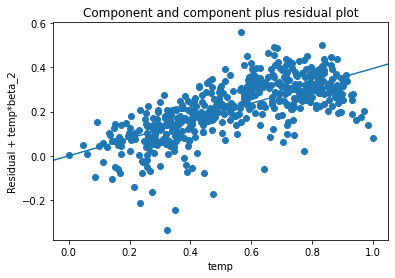

In [290]:
sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

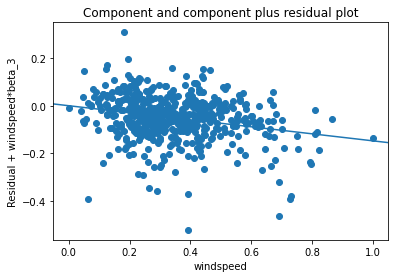

In [291]:
sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

### Insight: 
The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved

### Homoscedasticity

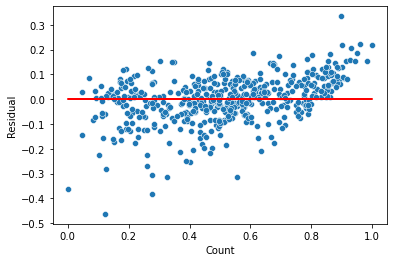

In [292]:
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Insight: 
There is no visible pattern in residual values, thus homoscedacity is well preserved

### Absence of Multicolinearity

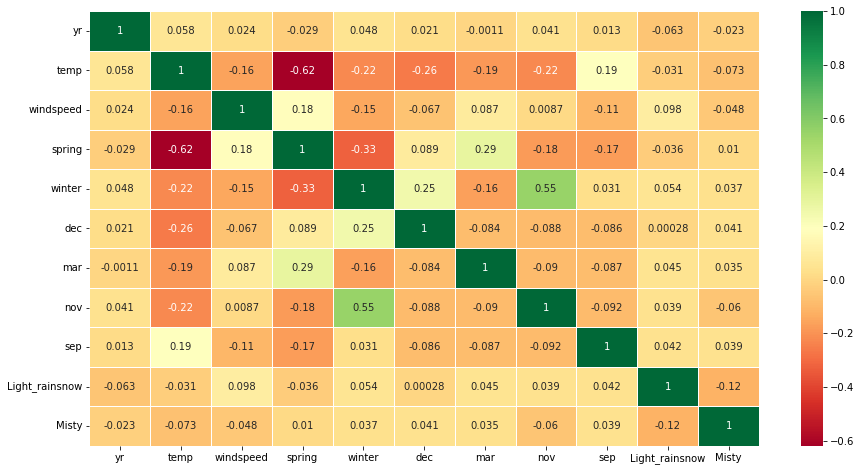

In [293]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [294]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.86
1,temp,4.16
4,winter,2.32
0,yr,2.04
3,spring,1.90
7,nov,1.79
10,Misty,1.51
5,dec,1.34
6,mar,1.21
8,sep,1.18


### Insight: 
All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.

### Independence of residuals

Autocorrelation refers to the fact that observations’ errors are correlated. To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.


0 – 2: positive auto-correlation
2 – 4: negative auto-correlation)


In [298]:
print('The Durbin-Watson value for Final Model lr 6 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 6 is 1.9998


### Insight: 
There is almost no autocorrelation.

### Normality of error

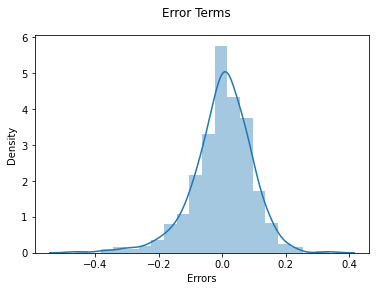

In [299]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

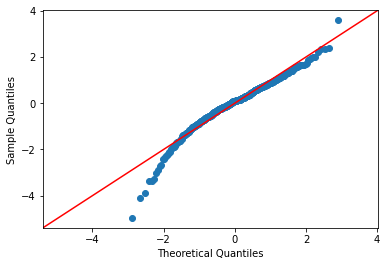

In [300]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

### Insight: 
Based on the histogram, we can conclude that error terms are following a normal distribution

###  Making Predictions using final model

### Scaling bike_test dataframe

Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data.In other words, we want to prevent the information leak from train to test dataset.

In [301]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,0,0,1,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,0,1,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,1,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,0,0,1,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,1,0,0


In [302]:
bike_test.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,0.550981,0.527344,0.662328,0.346015,0.519816,0.236364,0.268182,...,0.086364,0.081818,0.036364,0.322727,0.150000,0.140909,0.136364,0.150000,0.122727,0.168182
std,0.501120,0.198531,0.463173,0.228967,0.214959,0.143278,0.159517,0.219880,0.425817,0.444023,...,0.281541,0.274713,0.187620,0.468586,0.357886,0.348721,0.343957,0.357886,0.328872,0.374881
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing X_test and y_test

In [304]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [305]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   temp            220 non-null    float64
 3   windspeed       220 non-null    float64
 4   spring          220 non-null    uint8  
 5   winter          220 non-null    uint8  
 6   dec             220 non-null    uint8  
 7   mar             220 non-null    uint8  
 8   nov             220 non-null    uint8  
 9   sep             220 non-null    uint8  
 10  Light_rainsnow  220 non-null    uint8  
 11  Misty           220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 10.3 KB


In [306]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

### Model Evaluation

Text(0, 0.5, 'y_pred')

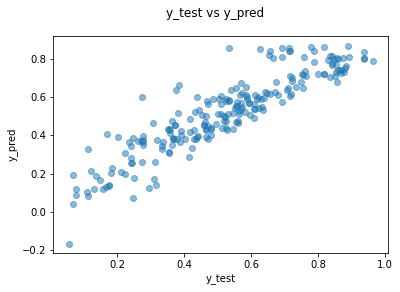

In [307]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

### R2 Value Calculation for bike_test dataframe

In [308]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.817

In [310]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8073

### Model Train & Test R2 Statsitics Comparison
|Measurement   |	Train Dataset|	Test Dataset
|:------------ |:-------------:| -------------:|
|R2 Value	   | 82.4%	|     82%
|Adjusted R2 Value| 82.1%	| 81.2%    |

### Calculating RMSE for the selected Model

In [312]:
from math import sqrt
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0938

### Calculating Mean Absolute Error for the selected Model

In [313]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0728

### Insight: 
The Root Mean Squared Error value for the test dataset based on final model is 0.093 and Mean Absolute Error is 0.0728, which indicates that the model is really good.

### Model Outcome Summary

As per the final model, the top 5 predictor variables that influences bike booking are:

* Temperature (Temp)
A coefficient value of ‘0.564438’ indicated that a temperature has significant impact on bike rentals
* Light Rain & Snow (weathersit =3)
A coefficient value of ‘-0.307082’ indicated that the light snow and rain deters people from renting out bikes
* Year (yr)
A coefficient value of ‘0.230252’ indicated that a year wise the rental numbers are increasing  

It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.

As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.